In [ ]:
'''
Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/content/emails.csv")
df

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.describe()

the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  ...   
mean      2.627030    55.517401     2.466551     2.024362    10.600155  ...   
std       6.229845    87.574172     4.314444     6.967878    19.281892  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000    12.000000     0.000000     0.000000     1.000000  ...   
50%       1.000000    28.000000     1.000000     0.000000     5.000000  ...   
75%       2.000000    62.250000     3.000000     1.000000    12.000000  ...   
max      77.000000  1898.000000    70.000000   167.000000   223.000000  ...   

          connevey          jay       valued          lay  infrastructure  \
count  5172.000000  5172.000000  5172.000000  5172.000000     5172.000000   
mean      0.005027     0.012568     0.010634     0.098028        0.004254   
std       0.105788     0.199682     0.116693     0.569532        0.096252   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000     0.000000        0.000000   
75%       0.000000     0.000000     0.000000     0.000000        0.000000   
max       4.000000     7.000000     2.000000    12.000000        3.000000   

          military     allowing           ff          dry   Prediction  
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  
mean      0.006574     0.004060     0.914733     0.006961     0.290023  
std       0.138908     0.072145     2.780203     0.098086     0.453817  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     1.000000     0.000000     1.000000  
max       4.000000     3.000000   114.000000     4.000000     1.000000  

[8 rows x 3001 columns]

In [5]:
df.isnull().sum()


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
# For null column
null_counts = df.isnull().sum()
# Filter the columns with more than one null value
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [12]:
# Removing Email no. column since it is unncessary

x = df.iloc[:,1:3001]
x.head()

the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  connevey  \
0    0   0    1    0    0   0    2    0    0   0  ...             0         0   
1    8  13   24    6    6   2  102    1   27  18  ...             0         0   
2    0   0    1    0    0   0    8    0    0   4  ...             0         0   
3    0   5   22    0    5   1   51    2   10   1  ...             0         0   
4    7   6   17    1    5   2   57    0    9   3  ...             0         0   

   jay  valued  lay  infrastructure  military  allowing  ff  dry  
0    0       0    0               0         0         0   0    0  
1    0       0    0               0         0         0   1    0  
2    0       0    0               0         0         0   0    0  
3    0       0    0               0         0         0   0    0  
4    0       0    0               0         0         0   1    0  

[5 rows x 3000 columns]

In [13]:
# Output Class

y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [14]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 ,random_state=12)


In [16]:

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#Fitting K-NN classifier to the training set

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1])

In [18]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]])

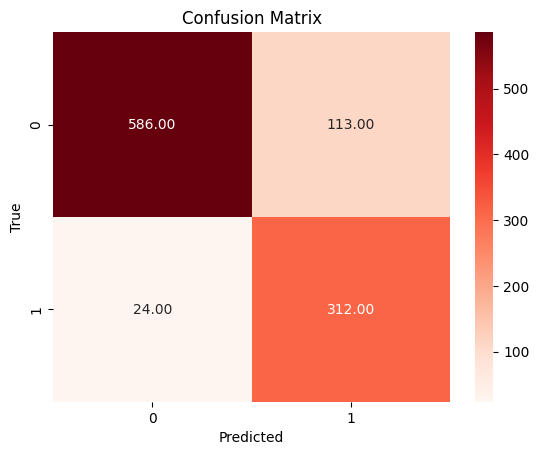

In [19]:
#Confusion matrix graph using seaborn

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
accuracy_score(y_test, y_pred_knn)

0.8676328502415459

In [21]:
recall_score(y_test, y_pred_knn)

0.9285714285714286

In [22]:
precision_score(y_test, y_pred_knn)

0.7341176470588235

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1])

In [24]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]])

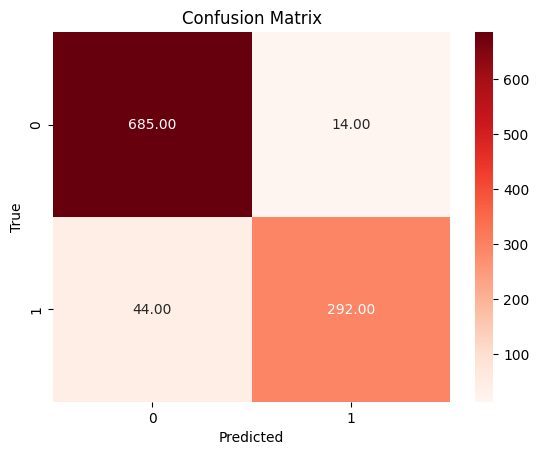

In [25]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
accuracy_score(y_test, y_pred_svc)


0.9439613526570049

In [27]:
recall_score(y_test, y_pred_knn)

0.9285714285714286

In [28]:
precision_score(y_test, y_pred_knn)

0.7341176470588235